In [35]:
from evaldet import Tracks, MOTMetrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


pd.set_option('precision', 2)

print(plt.rcParams["figure.figsize"])

[6.4, 4.8]


In [36]:

gt_tracks = Tracks.from_mot('./DATA/output_4_gt.txt')

### ¡¡¡FILES USING GT TRACKS AS THE BASE!!! ###
#tracks = Tracks.from_mot('./OUTPUT/reid_test_00025/results.txt')                           # 0.59 (--thr=0.00025)

### ¡¡¡FILES USING THE SAME DETECTIONS USED FOR GENERATING THE GROUND TRUTH!!! ###
#tracks = Tracks.from_mot('./OUTPUT/ocsort_tracking_output_4_16163.txt')                    # 0.87
#tracks = Tracks.from_mot('./OUTPUT/results_preds_deepocsort.txt')                          # 0.81
# TODO: Minut using fgbg & OCSORT
# TODO: Minut using fgbg & DeepOCSORT

### FILES USING KALMAN PREDICTIONS (AND SAME DETECTIONS) ###
#tracks = Tracks.from_mot('./OUTPUT/ocsort_tracking_output_4_kalman.txt')                   # 0.41
#tracks = Tracks.from_mot('./OUTPUT/output_4_kalman_pca.txt')                               # 0.41

### FILES USING NEW DETECTORS WITH THIS DATA INCLUDED ###
# TODO: Minut using yolo & OCSORT
# TODO: Minut using yolo & DeepOCSORT

### FILES USING NEW DETECTORS ###
#tracks = Tracks.from_mot('./OUTPUT/output_4_gt_trck_yolo_sahi_320_v2.txt')                 # 0.04
#tracks = Tracks.from_mot('./OUTPUT/output_4_gt_trck_yolo_sahi_640_08.txt')                 # 0.09
#tracks = Tracks.from_mot('./OUTPUT/output_4_gt_trck_yolo_sahi_640_09.txt')                 # 0.14
#tracks = Tracks.from_mot('./OUTPUT/output_4_gt_trck_yolo_sahi_640_12.txt')                 # 0.005
#tracks = Tracks.from_mot('./OUTPUT/post_trck_output_4_gt_trck_yolo_sahi_640_08.txt')       # 0.09
#tracks = Tracks.from_mot('./OUTPUT/post_trck_output_4_gt_trck_yolo_sahi_640_09.txt')       # 0.23
#tracks = Tracks.from_mot('./OUTPUT/post_trck_output_4_gt_trck_yolo_sahi_640_12.txt')       # 0.006
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_08.txt')       # 0.09
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_09.txt')       # 0.23 (--trackThreshold=0.4 --iouThreshold=0.2 --associationFunc=ciou)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_12.txt')       # 0.006
tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_09_v2.txt')    # 0.24 (--trackThreshold=0.2 --iouThreshold=0.3 --associationFunc=ciou)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_09_v3.txt')    # 0.22 (--trackThreshold=0.6 --iouThreshold=0.1 --associationFunc=ciou)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_09_v4.txt')    # 0.23 (--trackThreshold=0.1 --iouThreshold=0.5 --associationFunc=ciou)
#tracks = Tracks.from_mot('./OUTPUT/post_dets_output_4_gt_trck_yolo_sahi_640_09_v5.txt')    # 0.24 (--trackThreshold=0.4 --iouThreshold=0.3 --associationFunc=ciou)


eval_obj = MOTMetrics(clearmot_dist_threshold=0.5, id_dist_threshold=0.5)

In [37]:
metrics = eval_obj.compute(gt_tracks, tracks, clearmot_metrics=True, id_metrics=True, hota_metrics=True)
metrics['clearmot']['MOTP'] = 1 - metrics['clearmot']['MOTP']

In [38]:
print('CLEARMOT')
print(pd.DataFrame(metrics['clearmot'], index=['values']))
print('-' * 10)
print('IDs')
print(pd.DataFrame(metrics['id'], index=['values']))
print('-' * 10)
print('HOTA')
print(pd.DataFrame({k : v for k, v in metrics['hota'].items() if k in ['HOTA', 'DetA', 'AssA', 'LocA']}, index=['values']))

CLEARMOT
        MOTP  MOTA  FP_CLEAR  FN_CLEAR  IDSW
values  0.63 -0.49     21236     23902    86
----------
IDs
        IDTP   IDFP   IDFN   IDP   IDR  IDF1
values  5770  21957  24623  0.21  0.19   0.2
----------
HOTA
        HOTA  DetA  AssA  LocA
values  0.24  0.24  0.24  0.64


In [39]:
print('-' * 10)
print('HOTA alpha')

new = '_\\'
hota_alpha = pd.DataFrame({fr"${k.replace('_', new)}$" : v for k, v in metrics['hota'].items() if k not in ['HOTA', 'DetA', 'AssA', 'LocA', 'alphas_HOTA']}, index=metrics['hota']['alphas_HOTA'])
print(hota_alpha)

----------
HOTA alpha
      $HOTA_\alpha$  $DetA_\alpha$  $AssA_\alpha$  $LocA_\alpha$
0.05       1.18e-04       1.72e-05       8.05e-04           0.96
0.10       2.75e-03       5.16e-04       1.46e-02           0.92
0.15       6.28e-03       2.16e-03       1.83e-02           0.88
0.20       1.18e-02       5.59e-03       2.51e-02           0.84
0.25       2.07e-02       1.29e-02       3.33e-02           0.81
0.30       3.60e-02       2.54e-02       5.11e-02           0.77
0.35       5.25e-02       4.16e-02       6.61e-02           0.73
0.40       7.41e-02       6.41e-02       8.57e-02           0.70
0.45       1.02e-01       9.25e-02       1.13e-01           0.66
0.50       1.35e-01       1.26e-01       1.45e-01           0.63
0.55       1.77e-01       1.68e-01       1.86e-01           0.59
0.60       2.29e-01       2.20e-01       2.37e-01           0.56
0.65       2.89e-01       2.84e-01       2.94e-01           0.53
0.70       3.59e-01       3.60e-01       3.59e-01           0.49
0.7

(0.0, 1.0)

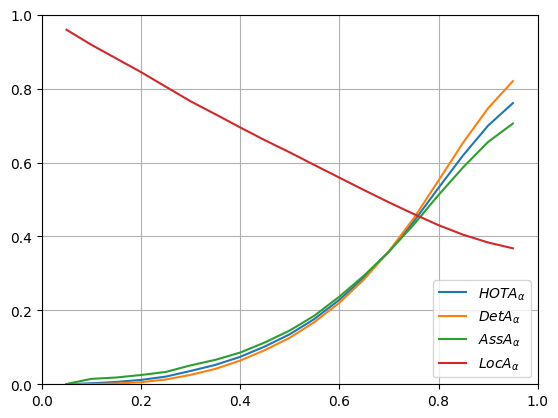

In [40]:
fig = hota_alpha.plot.line()
fig.grid(True)
fig.set_xlim(0, 1)
fig.set_ylim(0, 1)